### **Importing the dependencies**

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pickle

### **Loading the data**

In [132]:
# Loading the dataset
salary_data = pd.read_csv('../dataset/salary_data.csv')

In [133]:
# Getting information about the dataset
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [134]:
# Calculating the rows and columns of the dataset
rows, columns = salary_data.shape
print(f"Rows: {rows}, Columns: {columns}")

Rows: 30, Columns: 2


In [135]:
# Calculating null values in the dataset
null_values = salary_data.isnull().sum()
print("Null values in each column:")
print(null_values)

Null values in each column:
YearsExperience    0
Salary             0
dtype: int64


In [136]:
# Displaying the first few rows of the dataset
salary_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


### **Data visualization**

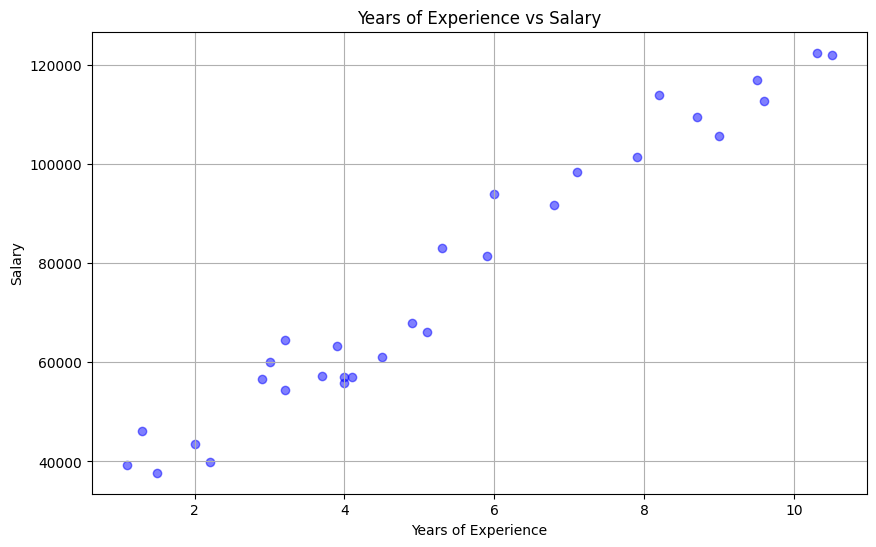

In [137]:
# Drawing a scatter plot to visualize the relationship between Years of Experience and Salary
plt.figure(figsize=(10, 6))
plt.scatter(salary_data['YearsExperience'], salary_data['Salary'], color='blue', alpha=0.5)
plt.title('Years of Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

<span style="color: red;"><strong>Conclusion:</strong></span> With the above scatter plot, I think we can choose linear regression model to predict the salary by years of experience.

### **Data preprocessing**

In [138]:
X = salary_data[['YearsExperience']]
Y = salary_data['Salary']

In [139]:
print(X)

    YearsExperience
0               1.1
1               1.3
2               1.5
3               2.0
4               2.2
5               2.9
6               3.0
7               3.2
8               3.2
9               3.7
10              3.9
11              4.0
12              4.0
13              4.1
14              4.5
15              4.9
16              5.1
17              5.3
18              5.9
19              6.0
20              6.8
21              7.1
22              7.9
23              8.2
24              8.7
25              9.0
26              9.5
27              9.6
28             10.3
29             10.5


In [140]:
print(Y)

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64


In [141]:
# Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [142]:
print(X.shape, X_train.shape, X_test.shape)

(30, 1) (24, 1) (6, 1)


### **Model training**

In [143]:
model = LinearRegression()

In [144]:
# Training the model
model.fit(X_train, Y_train)

LinearRegression()

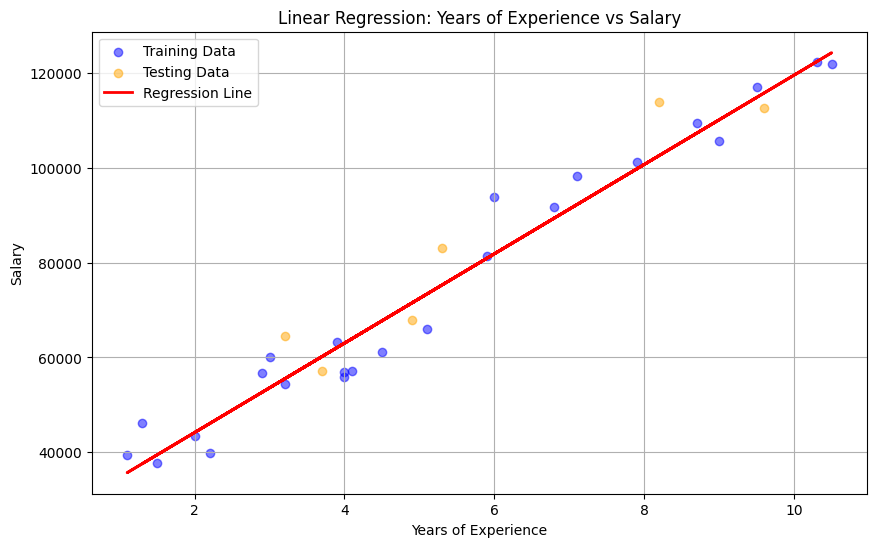

In [145]:
# Drawing the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_train, Y_train, color='blue', alpha=0.5, label='Training Data')
plt.scatter(X_test, Y_test, color='orange', alpha=0.5, label='Testing Data')
plt.plot(X_train, model.predict(X_train), color='red', linewidth=2, label='Regression Line')
plt.title('Linear Regression: Years of Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.show()

### **Model evaluation**

In [146]:
# Calculating R^2 score on the test set
Y_pred = model.predict(X_test)
r2 = r2_score(Y_test, Y_pred)

In [147]:
print(f"R^2 Score: {r2}")

R^2 Score: 0.9024461774180497


### **Saving trained model**

In [148]:
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)
    print("Model saved to model.pkl")

Model saved to model.pkl


### **Building predictive system**

In [149]:
# Loading trained model for prediction
with open('model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
    print("Model loaded from model.pkl")

# Defining input data for prediction
input_data = pd.DataFrame({'YearsExperience': [5, 10, 15]})

# Making predictions
predictions = loaded_model.predict(input_data)

print("Predictions for Years of Experience 5, 10, and 15:")
for exp, pred in zip(input_data['YearsExperience'], predictions):
    print(f"Years of Experience: {exp}, Predicted Salary: {pred:.2f}")

Model loaded from model.pkl
Predictions for Years of Experience 5, 10, and 15:
Years of Experience: 5, Predicted Salary: 72440.66
Years of Experience: 10, Predicted Salary: 119559.74
Years of Experience: 15, Predicted Salary: 166678.81
